In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#my functions
from Plot import plot_cv, plot_img

In [2]:
path = "../../../Data/hummingbird.jpg"
path2 = "../../../Data/tree.png"
img = cv.imread(path, cv.IMREAD_COLOR_RGB)
img2 = cv.imread(path2, cv.IMREAD_COLOR_RGB)
img.shape, img2.shape

((667, 1000, 3), (579, 1028, 3))

In [3]:
size_img = 500
img = cv.resize(img, (size_img, size_img))
img2 = cv.resize(img2, (size_img, size_img))

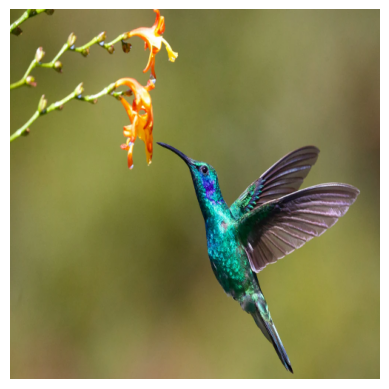

In [4]:
plot_img(img, False)

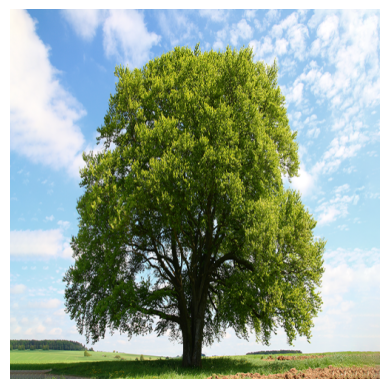

In [5]:
plot_img(img2)

In [6]:
def sum_images(imgA, imgB, alpha = 0.5):
    beta = 1 - alpha 
    height, width, channels = imgA.shape
    height2, width2, _ = imgB.shape

    #print(f"img1 {len(imgA.shape)}, img2: {len(imgB.shape)}")

    if height != height2 or width != width2:
        return 
    
    out = np.zeros((height, width, channels), dtype = np.uint8)
    
    for i in range(width):
        for j in range(height):
            out[i, j] = np.clip(alpha * imgA[i, j] + beta * imgB[i, j], 0, 255)

    return out

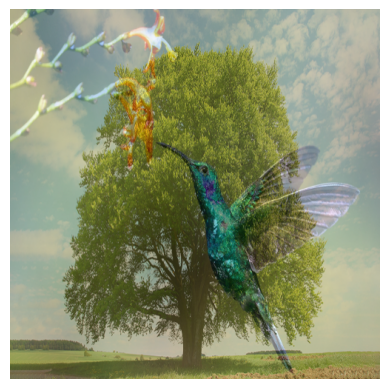

In [7]:
sum = sum_images(img, img2)
plot_img(sum)

In [8]:
def subtract_image(imgA, imgB):
    height, width, channels = imgA.shape
    height2, width2, _ = imgB.shape

    #print(f"img1 {len(imgA.shape)}, img2: {len(imgB.shape)}")

    if height != height2 or width != width2:
        return 
    
    out = np.zeros((height, width, channels), dtype = np.uint8)
    
    for i in range(width):
        for j in range(height):
            #out[i, j] = np.clip(imgA[i, j]- imgB[i, j], 0, 255)
            out[i, j] = imgA[i, j]- imgB[i, j]
    return out

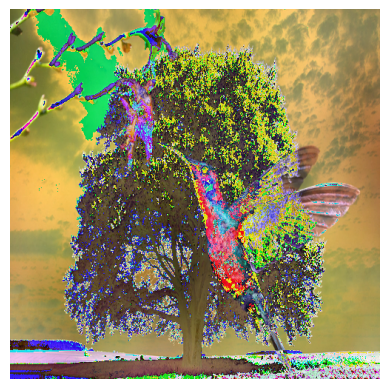

In [9]:
subs = subtract_image(img, img2)
plot_img(subs)

In [10]:
def sum_value(img, value = 100):
    height, width, channels = img.shape

    out = np.zeros((height, width, channels), dtype = np.uint8)
    
    for i in range(width):
        for j in range(height):
            out[i, j] = np.clip(img[i, j] + value, 0, 255)

    return out

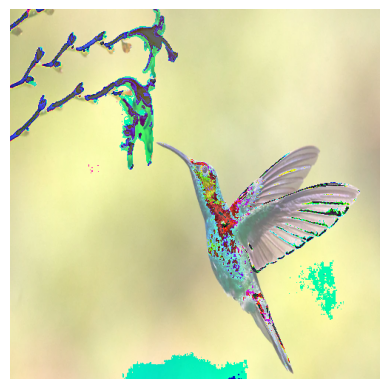

In [11]:
sum = sum_value(img)
plot_img(sum)

In [12]:
def subtract_value(img, value = 100):
    height, width, channels = img.shape

    out = np.zeros((height, width, channels), dtype = np.uint8)
    
    for i in range(width):
        for j in range(height):
            out[i, j] = np.clip(img[i, j] - value, 0, 255)

    return out

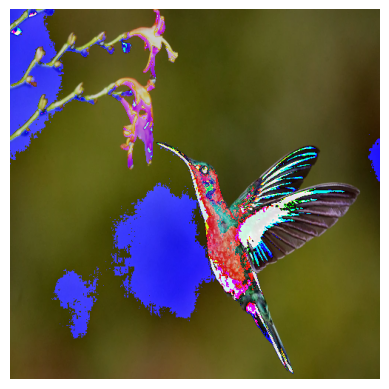

In [13]:
rest = subtract_value(img, 50)
plot_img(rest)

In [14]:
def negative(img, white = 255):
    height, width, channels = img.shape

    out = np.zeros((height, width, channels), dtype = np.uint8)
    
    for i in range(width):
        for j in range(height):
            out[i, j] = np.clip(abs(white - img[i, j]), 0, 255)

    return out

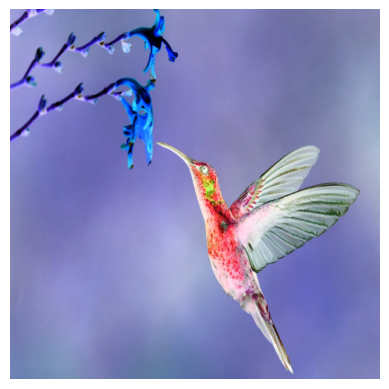

In [15]:
neg = negative(img)
plot_img(neg)

In [16]:
def square_image(img):
    img_float32 = img.astype(np.float32)
    height, width, channels = img.shape
    out = np.zeros((height, width, channels), dtype=np.uint8)

    for i in range(width):
        for j in range(height):
            out[i, j] = np.clip(img_float32[i, j]**2 / 255, 0, 255).astype(np.uint8)

    return out
            

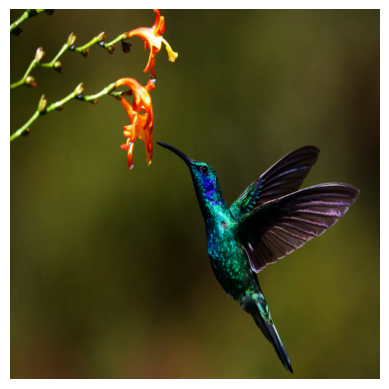

In [17]:
sqt = square_image(img)
plot_img(sqt)

In [18]:
def square_root_image(img):
    img_float32 = img.astype(np.float32)
    height, width, channels = img.shape
    out = np.zeros((height, width, channels), dtype=np.uint8)

    for i in range(width):
        for j in range(height):
            #out[i, j] = np.clip((img_float32[i, j] ** (1/2)) * (255 ** (2/3)), 0, 255).astype(np.uint8)
            out[i, j] = np.clip(np.sqrt(img_float32[i, j]) * np.sqrt(255), 0, 255).astype(np.uint8)

    return out

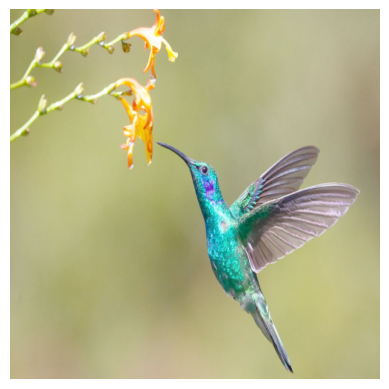

In [19]:
root_sqr = square_root_image(img)
plot_img(root_sqr)

In [20]:
def cube_root(img):
    img_float32 = img.astype(np.float32)
    height, width, channels = img.shape
    out = np.zeros((height, width, channels), dtype=np.uint8)

    for i in range(width):
        for j in range(height):
            out[i, j] = np.clip((img_float32[i, j] ** (1/3)) * (255 ** (2/3)), 0, 255).astype(np.uint8)

    return out

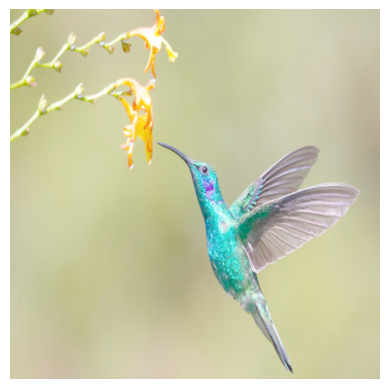

In [21]:
cubic = cube_root(img)
plot_img(cubic)

In [22]:
def n_root(img, n = 4):
    if n <= 0:
        raise ValueError("Cannot compute the root for n <= 0")
    
    img_float32 = img.astype(np.float32)
    height, width, channels = img.shape
    out = np.zeros((height, width, channels), dtype=np.uint8)

    for i in range(width):
        for j in range(height):
            out[i, j] = np.clip((img_float32[i, j] ** (1/n)) * (255 ** (2/n)), 0, 255).astype(np.uint8)

    return out

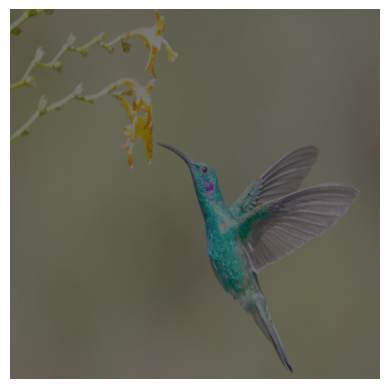

In [23]:
n_the = n_root(img, 3.48)
plot_img(n_the)

In [24]:
def move_image(img, dx = 10, dy = 10):
    height, width, channels = img.shape
    
    out = np.zeros((height, width, channels), dtype = np.uint8)
    
    for i in range(width):
        for j in range(height):
            mov_i, mov_j = i + dx, j + dy
            if 0 <= mov_i < height and 0 <= mov_j < width:
                out[mov_i, mov_j] = img[i, j]

    return out

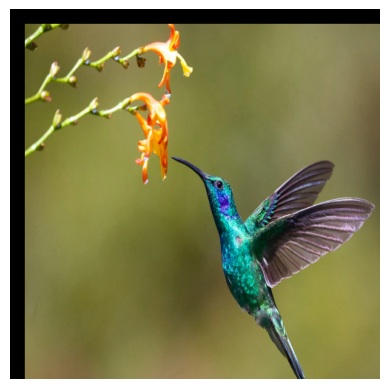

In [25]:
move = move_image(img, 20, 20)
plot_img(move)

In [26]:
def rotate_img(img, degrees = 90):
    angle = np.radians(degrees)
    height, width, channels = img.shape
    out = np.zeros((height, width, channels), dtype = np.uint8)

    center_x, center_y = width // 2, height // 2

    for i in range(width):
        for j in range(height):
            x = j - center_y
            y = i - center_x

            xr = int(x * np.cos(angle) - y * np.sin(angle))
            yr = int(x * np.sin(angle) + y * np.cos(angle))

            xi = yr + center_x
            yj = xr + center_y

            if 0 <= xi < width and 0 <= yj < height:
                out[i, j] = img[xi, yj]
    return out


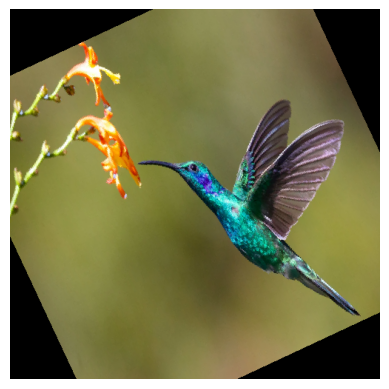

In [27]:
rota = rotate_img(img, 25)
plot_img(rota)

In [ ]:
def reflection_x(img):
    height, width, channels = img.shape
    out = np.zeros((height, width, channels), dtype = np.uint8)

    for i in range(width):
        for j in range(height):
            new_j = height - j - 1  

            if 0 <= new_j < height:
                out[new_j, i] = img[j, i]
    return out

In [32]:
def reflection_y(img):
    height, width, channels = img.shape
    out = np.zeros((height, width, channels), dtype = np.uint8)

    for i in range(width):
        for j in range(height):
            new_i = width - i - 1  

            if 0 <= new_i < width:
                out[j, new_i] = img[j, i]
    return out

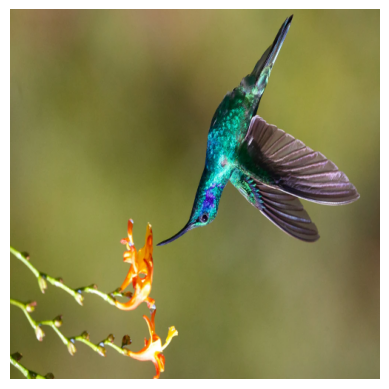

In [ ]:
rot_x = reflection_x(img)
plot_img(rot_x)

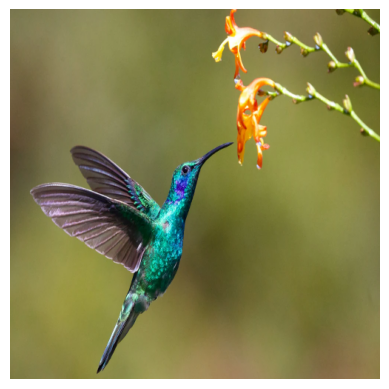

In [33]:
rot_y = reflection_y(img)
plot_img(rot_y)